<a href="https://colab.research.google.com/github/DaasDaham/MIDASLearningAssignments/blob/master/LoR_DT_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv
Saving test.csv to test (2).csv


In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing       

In [70]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [71]:
print(df.head())
print(df_test.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [72]:
df_labels = df[['Survived']]
df = df.drop('Survived', axis=1)
columns_order = sorted(df.columns)
df = df.reindex(columns_order, axis=1)
df_test = df_test.reindex(columns_order, axis=1)
df = df.drop('PassengerId', axis=1)
df_test = df_test.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df_test = df_test.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df_test = df_test.drop('Ticket', axis=1)
print(df.head())
print(df.columns)
print(df_test.head())
print(df_test.columns)
print(df_labels.head)

    Age Cabin Embarked     Fare  Parch  Pclass     Sex  SibSp
0  22.0   NaN        S   7.2500      0       3    male      1
1  38.0   C85        C  71.2833      0       1  female      1
2  26.0   NaN        S   7.9250      0       3  female      0
3  35.0  C123        S  53.1000      0       1  female      1
4  35.0   NaN        S   8.0500      0       3    male      0
Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'], dtype='object')
    Age Cabin Embarked     Fare  Parch  Pclass     Sex  SibSp
0  34.5   NaN        Q   7.8292      0       3    male      0
1  47.0   NaN        S   7.0000      0       3  female      1
2  62.0   NaN        Q   9.6875      0       2    male      0
3  27.0   NaN        S   8.6625      0       3    male      0
4  22.0   NaN        S  12.2875      1       3  female      1
Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'], dtype='object')
<bound method NDFrame.head of      Survived
0           0
1       

In [73]:
columns_to_encode = ['Sex','Cabin','Embarked']
for cols in df.columns:
    if cols not in columns_to_encode:
        if df[cols].isnull().values.any() == True:
            print(cols, "train")
        if df_test[cols].isnull().values.any() == True:            
            print(cols, "test")   

Age train
Age test
Fare test


In [74]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [75]:
for cols in columns_to_encode:
    le = preprocessing.LabelEncoder()
    df[cols] = le.fit_transform(df[cols].astype(str))
    df_test[cols] = le.fit_transform(df_test[cols].astype(str))

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

In [77]:
%matplotlib inline
def train_and_test_a_model(df_X, df_y, classifier, model_name):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, shuffle=True)
    model = classifier
    y_test = y_test.values.ravel()
    y_train = y_train.values.ravel()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average=None)
    print("Accuracy: ",acc)
    print("f1 Score: ",f1)
    print(confusion_matrix(y_test, y_pred))

    # Source - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

    ns_prob = [0 for i in range(len(y_test))]
    model_prob = model.predict_proba(X_test)
    model_prob = model_prob[:, 1]
    ns_auc = roc_auc_score(y_test, ns_prob)
    model_auc = roc_auc_score(y_test, model_prob)
    ns_fpr, ns_tpr, ns_thresholds = roc_curve(y_test, ns_prob)
    model_fpr, model_tpr, model_thresholds = roc_curve(y_test, model_prob)
    print("AUC: ",model_auc)
    print("Thresholds: ", model_thresholds)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    test_pred = model.predict(df_test)
    test_pred = pd.DataFrame(test_pred)
    test_pred.to_csv('{}_pred.csv'.format(model_name))
    files.download('{}_pred.csv'.format(model_name))

Accuracy:  0.8171641791044776
f1 Score:  [0.85630499 0.74871795]
[[146  16]
 [ 33  73]]
AUC:  0.8651583973911018
Thresholds:  [1.97446965 0.97446965 0.88309525 0.88246822 0.80840842 0.80202927
 0.79609855 0.79563543 0.76996505 0.75818293 0.75743356 0.72063011
 0.71877838 0.71732191 0.71628395 0.63826024 0.63531153 0.63477502
 0.63469108 0.63465675 0.62375677 0.6194902  0.61091478 0.60672997
 0.58349432 0.52628291 0.52215168 0.47009751 0.45788619 0.43508938
 0.43353502 0.40665344 0.38911684 0.36842561 0.35542568 0.34301041
 0.33901012 0.33303782 0.33254594 0.31332158 0.30713662 0.30292619
 0.29789049 0.28934033 0.26994297 0.24592208 0.24060257 0.22293515
 0.22243222 0.20344675 0.19739436 0.1756313  0.1723078  0.16560286
 0.16106612 0.15283707 0.1524966  0.15249446 0.14626779 0.14524298
 0.13995956 0.13964344 0.1299419  0.12879583 0.12868511 0.12868325
 0.12511238 0.12507816 0.12469338 0.12461571 0.12104519 0.12080465
 0.11227743 0.10962733 0.1072677  0.10533213 0.10213791 0.10191635
 0.

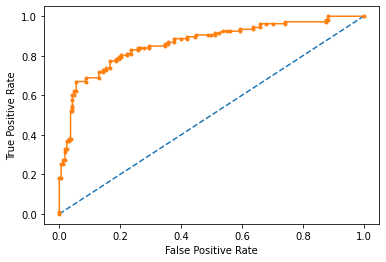

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
# Logistic Regression
train_and_test_a_model(df, df_labels, LogisticRegression(max_iter=10000), "logreg")

Accuracy:  0.753731343283582
f1 Score:  [0.79503106 0.69158879]
[[128  30]
 [ 36  74]]
AUC:  0.7426352128883774
Thresholds:  [2.         1.         0.5        0.16666667 0.        ]


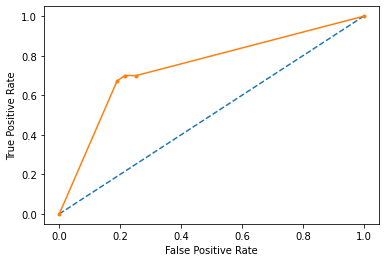

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# Decision Tree
train_and_test_a_model(df, df_labels, DecisionTreeClassifier(), "dt")

Accuracy:  0.8097014925373134
f1 Score:  [0.85043988 0.73846154]
[[145  28]
 [ 23  72]]
AUC:  0.8362944934590812
Thresholds:  [2.         1.         0.99       0.98       0.97       0.96
 0.95       0.94808333 0.94       0.93       0.92       0.91
 0.9        0.89       0.88       0.87       0.86       0.85871429
 0.85       0.83932359 0.821      0.81       0.8        0.79
 0.78       0.77       0.75666667 0.73       0.69       0.65057035
 0.65       0.64       0.62       0.61       0.59       0.58
 0.56       0.54833333 0.541      0.54       0.53       0.51
 0.49       0.48       0.43       0.41       0.4        0.39083333
 0.39       0.38       0.37833333 0.37       0.34333333 0.34
 0.33333333 0.32       0.31       0.3        0.29       0.27
 0.26       0.23       0.22       0.2        0.1845     0.17
 0.16       0.15       0.135      0.12       0.11       0.10833333
 0.1        0.094      0.09       0.08       0.07161905 0.07
 0.06       0.05       0.04583333 0.04       0.03       0

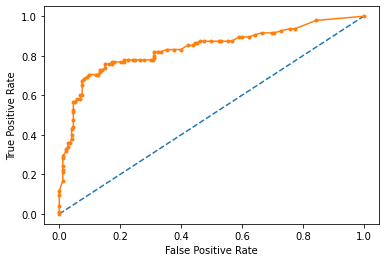

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Random Forest
train_and_test_a_model(df, df_labels, RandomForestClassifier(), "rf")